<a href="https://colab.research.google.com/github/bhaveshUp2010/satterlite_image_segmentation/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U patchify

##Installing the dataset

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery

In [ ]:
# !unzip semantic-segmentation-of-aerial-imagery.zip -d ./aerial_dataset

##Doing Necessary Imports

In [1]:
import os
import cv2
import random
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from patchify import patchify
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'patchify'

In [ ]:
min_max_scaler = MinMaxScaler()

##Mounted dataset to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_path = '/content/drive/MyDrive/aerial_dataset'
os.makedirs(drive_path, exist_ok= True)

In [ ]:
# !cp -r ./aerial_dataset/* "/content/drive/MyDrive/aerial_dataset/"

In [ ]:
ds_root_folder = "/content/drive/MyDrive/aerial_dataset/"
ds_name = "Semantic segmentation dataset"

##Processing the images

In [ ]:
for path, subdirs, files in os.walk(os.path.join(ds_root_folder, ds_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        # print(image_name)
        a =True

/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 5/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/aerial_dataset/Semantic segmentation dataset/Tile 8/masks


In [ ]:
image_ds = []
mask_ds = []
image_patch_size = 256
for image_type in ["images", "masks"]:
    if image_type == "images":
      image_extension = "jpg"
    elif image_type == "masks":
      image_extension = "png"
    for tile_id in range(1, 8):
      for image_id in range(1, 20):
        image = cv2.imread(f'{ds_root_folder}/{ds_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
        if image is not None:
          if image_type == "masks":
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          # print(image.shape)
          size_x = (image.shape[1]//image_patch_size)*image_patch_size
          size_y = (image.shape[0]//image_patch_size)*image_patch_size
          image = Image.fromarray(image)
          image = image.crop((0, 0, size_x, size_y))
          image = np.array(image)
          patchified_image = patchify(image, (image_patch_size, image_patch_size, 3), step= image_patch_size)
          # print(patchified_image.shape)
          # print(len(patchified_image))
          for i in range(patchified_image.shape[0]):
            for j in range(patchified_image.shape[1]):
              if image_type == "images":
                individual_patched_img = patchified_image[i,j,:,:]
                # print(individual_patched_img.shape)
                individual_patched_img = min_max_scaler.fit_transform(individual_patched_img.reshape(-1, individual_patched_img.shape[-1])).reshape(individual_patched_img.shape)
                individual_patched_img = individual_patched_img[0]
                #print(individual_patched_img.shape)
                image_ds.append(individual_patched_img)
              elif image_type == "masks":
                individual_patched_mask = patchified_image[i,j,:,:]
                individual_patched_mask = individual_patched_mask[0]
                #print(individual_patched_mask.shape)
                mask_ds.append(individual_patched_mask)

In [ ]:
print(len(image_ds))
print(len(mask_ds))
print(type(image_ds))
print(type(mask_ds))

945
945
<class 'list'>
<class 'list'>


In [ ]:
image_ds = np.array(image_ds)
mask_ds = np.array(mask_ds)
print(len(image_ds))
print(len(mask_ds))
print(type(image_ds))
print(type(mask_ds))

945
945
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##Plot Random Images

(-0.5, 255.5, 255.5, -0.5)

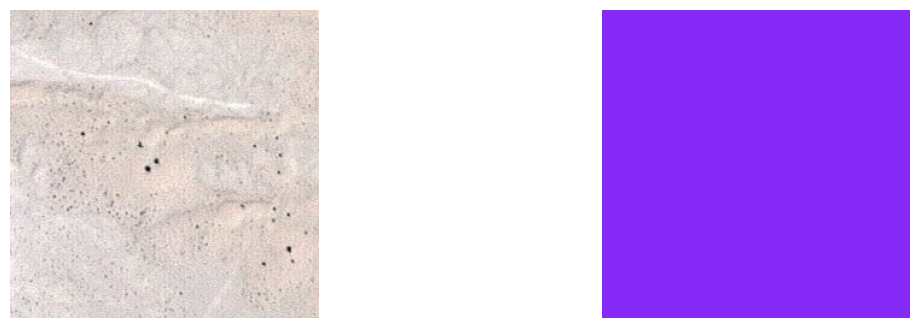

In [ ]:
random_image_id = random.randint(0, len(image_ds))
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(image_ds[random_image_id])
plt.axis("off")
plt.subplot(122)
plt.imshow(mask_ds[random_image_id])
plt.axis("off")

##Converting hex to RGB

In [ ]:
Building_class = "#3C1098"
Building_class = Building_class.lstrip("#")
Building_class = np.array(tuple(int(Building_class[i:i+2], 16) for i in (0,2,4)))
print(Building_class)

Land_class = "#8429F6"
Land_class = Land_class.lstrip("#")
Land_class = np.array(tuple(int(Land_class[i:i+2], 16) for i in (0,2,4)))
print(Land_class)

Road_class = "#6EC1E4"
Road_class = Road_class.lstrip("#")
Road_class = np.array(tuple(int(Road_class[i:i+2], 16) for i in (0,2,4)))
print(Road_class)

Vegetation_class = "#FEDD3A"
Vegetation_class = Vegetation_class.lstrip("#")
Vegetation_class = np.array(tuple(int(Vegetation_class[i:i+2], 16) for i in (0,2,4)))
print(Vegetation_class)

Water_class = "#E2A929"
Water_class = Water_class.lstrip("#")
Water_class = np.array(tuple(int(Water_class[i:i+2], 16) for i in (0,2,4)))
print(Water_class)

Unlabeled_class = "#9B9B9B"
Unlabeled_class = Unlabeled_class.lstrip("#")
Unlabeled_class = np.array(tuple(int(Unlabeled_class[i:i+2], 16) for i in (0,2,4)))
print(Unlabeled_class)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


##Labelling mask images

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype = np.uint8)
  label_segment[np.all(label == Water_class, axis=-1)] = 0
  label_segment[np.all(label == Land_class, axis=-1)] = 1
  label_segment[np.all(label == Road_class, axis=-1)] = 2
  label_segment[np.all(label == Building_class, axis=-1)] = 3
  label_segment[np.all(label == Vegetation_class, axis=-1)] = 4
  label_segment[np.all(label == Unlabeled_class, axis=-1)] = 5

  label_segment = label_segment[:,:,0]
  return label_segment

In [ ]:
labels = []
for i in range(mask_ds.shape[0]):
  label = rgb_to_label(mask_ds[i])
  labels.append(label)

In [ ]:
labels = np.array(labels)

In [ ]:
labels.shape

(945, 256, 256)

In [ ]:
labels = np.expand_dims(labels, axis=3)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


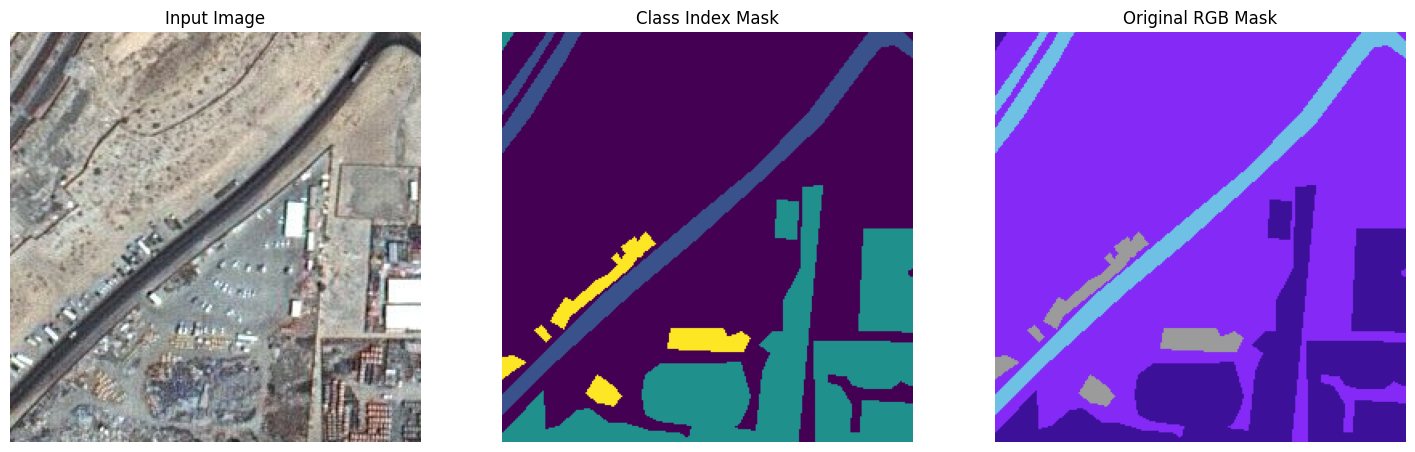

In [ ]:
random_image_id = random.randint(0, len(image_ds))
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_ds[random_image_id])
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(labels[random_image_id][:,:,0])  # Use colormap for class indices
plt.title("Class Index Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(mask_ds[random_image_id])
plt.title("Original RGB Mask")
plt.axis("off")

plt.show()

##Creating train test set

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
labels_categorical_ds = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_ds.shape

(945, 256, 256, 6)

In [ ]:
master_training_ds = image_ds

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_training_ds, labels_categorical_ds, test_size=0.15, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [ ]:
ls '/content/drive/MyDrive/aerial_dataset'

'Semantic segmentation dataset'/


In [ ]:
drive_path = '/content/drive/MyDrive/aerial_dataset/processed_ds'
os.makedirs(drive_path, exist_ok= True)

In [ ]:
np.save("/content/drive/MyDrive/aerial_dataset/processed_ds/X_train.npy", X_train)
np.save("/content/drive/MyDrive/aerial_dataset/processed_ds/y_train.npy", y_train)
np.save("/content/drive/MyDrive/aerial_dataset/processed_ds/X_test.npy", X_test)
np.save("/content/drive/MyDrive/aerial_dataset/processed_ds/y_test.npy", y_test)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
image_classes = y_train.shape[3]